## Introduction

We will be exploring a survey result compiled by FiveThirtyEight to answer the following question:

**Does the rest of America realise that "The Empire Stirkes Back" is clearly the best of the bunch?**

The online survey was sent to *Star Wars* fans and the team received 835 responses, which could be downloaded [here](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

The survey includes columns such as:
- RespondentID
- Gender
- Age
- Household Income
- Education
- Location (Census Region)
- Have you seen any of the 6 films in the Star Wars franchise? - Has 'Yes' or 'No' response
- Do you consider yourself to be a fan of the Star Wars film franchise? - Has 'Yes' or 'No' response

In [1]:
# read the data set into dataframe
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
# note that encoding was specified
# read up on blog: https://www.joelonsoftware.com/2003/10/08/the-absolute-minimum-every-software-developer-absolutely-positively-must-know-about-unicode-and-character-sets-no-excuses/

In [2]:
# explore data set
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

The first row is not a survey response and should be dropped.

There are column names such as 'Unnamed: 4', 'Unnamed" 5'... that are ranked list for favorite franchise and character that could be represented better.

Also, not all rankings were completed by the respondents, causing 'Unnamed' columns to hold many null values. We should process these null values appropriately before proceeding.

In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [4]:
# remove rows where 'RespondentID' is NaN
bool_mask = pd.notnull(star_wars['RespondentID'])
star_wars = star_wars[bool_mask]

## Cleaning and Mapping Yes/No Columns

There are two columns in the survey that have Yes/No responses, we will convert them into Boolean type for ease of analysis later on.

In [5]:
# understanding values in Yes/No columns
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [6]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [7]:
# convert str to bool dtype
yes_no = {
    "Yes": True,
    "No": False
}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

In [8]:
# verify result
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

## Cleaning and Mapping Checkbox Columns

For columns[3:9], it is the response to a single checkbox question, asking which of the Star Wars franchise has the respondent seen.

We will assume that null values means that respondent has not seen the movie and convert the results into Boolean types and also rename the columns.

In [9]:
# understanding the response for each column
cols = star_wars.columns[3:9]
for col in cols:
    print(star_wars[col].value_counts())
    print('\n')

Star Wars: Episode I  The Phantom Menace    673
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64


Star Wars: Episode II  Attack of the Clones    571
Name: Unnamed: 4, dtype: int64


Star Wars: Episode III  Revenge of the Sith    550
Name: Unnamed: 5, dtype: int64


Star Wars: Episode IV  A New Hope    607
Name: Unnamed: 6, dtype: int64


Star Wars: Episode V The Empire Strikes Back    758
Name: Unnamed: 7, dtype: int64


Star Wars: Episode VI Return of the Jedi    738
Name: Unnamed: 8, dtype: int64




In [10]:
# converting to bool dtype
import numpy as np
seen_map = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    np.NaN: False
}

for i in range(3,9):
    star_wars.iloc[:,i] = star_wars.iloc[:,i].map(seen_map)

In [11]:
# renaming columns
col_name_map = {
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4": "seen_2",
    "Unnamed: 5": "seen_3",
    "Unnamed: 6": "seen_4",
    "Unnamed: 7": "seen_5",
    "Unnamed: 8": "seen_6"
}

star_wars = star_wars.rename(columns=col_name_map)

In [12]:
# verify results
cols = star_wars.columns[3:9]
for col in cols:
    print(star_wars[col].value_counts())
    print('\n')

True     673
False    513
Name: seen_1, dtype: int64


False    615
True     571
Name: seen_2, dtype: int64


False    636
True     550
Name: seen_3, dtype: int64


True     607
False    579
Name: seen_4, dtype: int64


True     758
False    428
Name: seen_5, dtype: int64


True     738
False    448
Name: seen_6, dtype: int64




## Cleaning the Ranking Columns

For columns[9:15], repondents were asked to rank the Star Wars movies in order of preferance. We now need to clean up these data and rename the columns.

In [13]:
# convert data into numeric dtype
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype('float')

In [14]:
# renaming columns
col_pref_map = {
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
    "Unnamed: 10": "ranking_2",
    "Unnamed: 11": "ranking_3",
    "Unnamed: 12": "ranking_4",
    "Unnamed: 13": "ranking_5",
    "Unnamed: 14": "ranking_6"
}

star_wars = star_wars.rename(columns=col_pref_map)

## Finding the Highest-Ranked Movie

We can use the cleaned data to find the highest-ranked movie easily.

In [15]:
# finding ranking means
star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

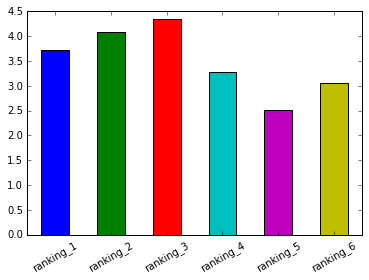

In [16]:
# magic command to show plot in notebook
%matplotlib inline
# plot bar chart of each ranking
star_wars[star_wars.columns[9:15]].mean().plot.bar(rot=30)

We renamed the columns, then converted the data type to numeric for these ranking columns, and then found the mean for each column. This will show the average ranking that Star War fans attribute to each movie in the series.

We find that the fifth Star Wars movie "Star Wars: Episode IV A New Hope" is the highest ranked movie with an average ranking of 2.51, the sixth movie follows at 3.05. (Note that the lower the ranking, the higher the preference.)

## Finding the Most Viewed Movie

We will use the data from the checkbox columns to find the most viewed movie in the franchise.

In [17]:
# finding sum of 'seen' columns
star_wars[star_wars.columns[3:9]].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

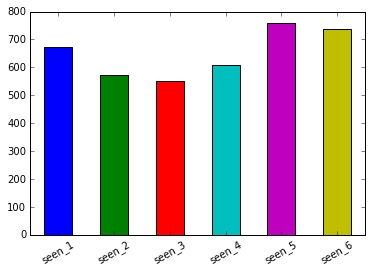

In [18]:
# plot bar chart of viewing frequency
star_wars[star_wars.columns[3:9]].sum().plot.bar(rot=30)

We can see that the fifth movie has the widest viewer reach at 758 views, which is closely followed by the sixth movie at 738 views.

The results suggest a high correlation between view frequency of a title and its audience rating.

## Exploring the Data by Binary Segments

We can conduct more nuanced analysis by breaking the data into different segments then applying the same analysis to find the results of different viewer groups.

We can split the data set via many different characteristics. If we wish to conduct a binary split, possible column candidates include:
- Do you consider yourself to be a fan of the Star Wars film franchise? - True or False
- Do you consider yourself to be a fan of the Star Trek franchise? - Yes or No
- Gender - Male or Female

We choose to split the data according to whether the respondent is a Star Trek fan.

In [19]:
# understanding values of column
star_wars.iloc[:,-6].value_counts(dropna=False)

No     641
Yes    427
NaN    118
Name: Do you consider yourself to be a fan of the Star Trek franchise?, dtype: int64

In [20]:
# splitting the data
star_trek_y = star_wars[star_wars.iloc[:,-6] == 'Yes']
star_trek_n = star_wars[star_wars.iloc[:,-6] == 'No']

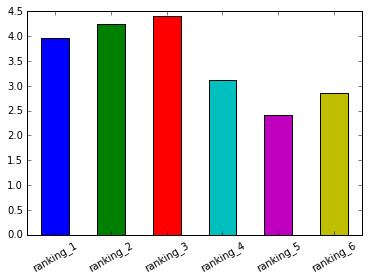

In [21]:
# plot bar chart of each ranking for Star Trek fans
star_trek_y[star_trek_y.columns[9:15]].mean().plot.bar(rot=30)

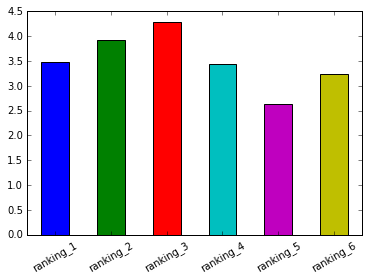

In [22]:
# plot bar chart of each ranking for NON Star Trek fans
star_trek_n[star_trek_n.columns[9:15]].mean().plot.bar(rot=30)

It would seem that the order of rankings for both groups are in line with the total sample. Though the lower three rankings of the Star Trek fans seems to be more pronounced than non fans.

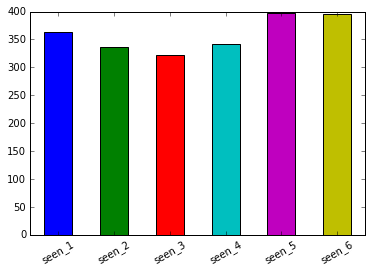

In [23]:
# plot bar chart of viewing frequency for Star Trek fans
star_trek_y[star_trek_y.columns[3:9]].sum().plot.bar(rot=30)

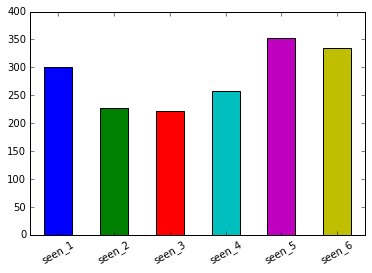

In [24]:
# plot bar chart of viewing frequency for NON Star Trek fans
star_trek_n[star_trek_n.columns[3:9]].sum().plot.bar(rot=30)

Because there are more Star Trek fans in the survey than non fans, so frequencies will be higher for the first plot compared to the second.

It is interesting to note that variation between movies are much smaller for Star Trek fans, meaning that they are more likely to have seen the entire franchise than non fans.

## Potential Next Steps

Here are some potential next steps:

- Try to segment the data based on columns like Education, Location (Census Region), and Which character shot first?, which aren't binary. Are they any interesting patterns?
- Clean up columns 15 to 29, which contain data on the characters respondents view favorably and unfavorably.
    - Which character do respondents like the most?
    - Which character do respondents dislike the most?
    - Which character is the most controversial (split between likes and dislikes)?